## Project Title: Corporate Fraud Detection Using Email Clustering

Name : Hrithik Deep

This project uses unsupervised learning to detect possible patterns of fraudulent behavior in corporate emails. By clustering messages based on text similarity, we aim to uncover unusual communication patterns that may suggest fraud.

**Dataset Used**: `split_emails.csv`  
**Techniques**: TF-IDF Vectorization, KMeans Clustering  
**Libraries**: Pandas, Matplotlib, Seaborn, WordCloud, scikit-learn


 **Step-1 Load and Preview the Data**

We begin by loading the dataset and checking the structure of the data.


In [10]:
import pandas as pd

# Load dataset
df = pd.read_csv("split_emails.csv")

# Preview structure

df.head()


,Unnamed: 0,file,message
0,0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   file        10000 non-null  object
 2   message     10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


## Step -2 Data Cleaning

We clean the data by:
- Dropping unused index columns
- Checking for and removing duplicates
- Checking for null values


In [15]:
# Drop unnamed index column if exists
df.drop(columns=['Unnamed: 0'], errors='ignore', inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Null value check
df.isnull().sum()


file       0
message    0
dtype: int64

## Step 3: Create a New Feature (Email Length)
 **Feature Engineering - Email Length**

We add a column that stores the length of each email for EDA purposes.


In [19]:
# Add email length column
df["email_length"] = df["message"].apply(len)

# Preview
df[['message', 'email_length']].head()


,message,email_length
0,Message-ID: <18782981.1075855378110.JavaMail.e...,492
1,Message-ID: <15464986.1075855378456.JavaMail.e...,1276
2,Message-ID: <24216240.1075855687451.JavaMail.e...,462
3,Message-ID: <13505866.1075863688222.JavaMail.e...,607
4,Message-ID: <30922949.1075863688243.JavaMail.e...,460


## Step 4: Visualize Email Length Distribution


We visualize how long typical emails are to detect patterns or outliers.


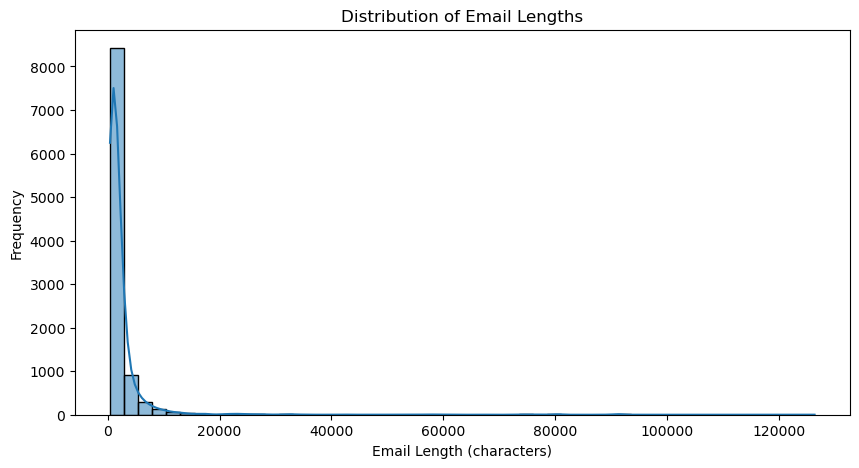

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df["email_length"], bins=50, kde=True)
plt.title("Distribution of Email Lengths")
plt.xlabel("Email Length (characters)")
plt.ylabel("Frequency")
plt.show()


## Step-5 Most Common Words in All Emails
 
We will now extract the most frequent words in all emails to understand common themes.


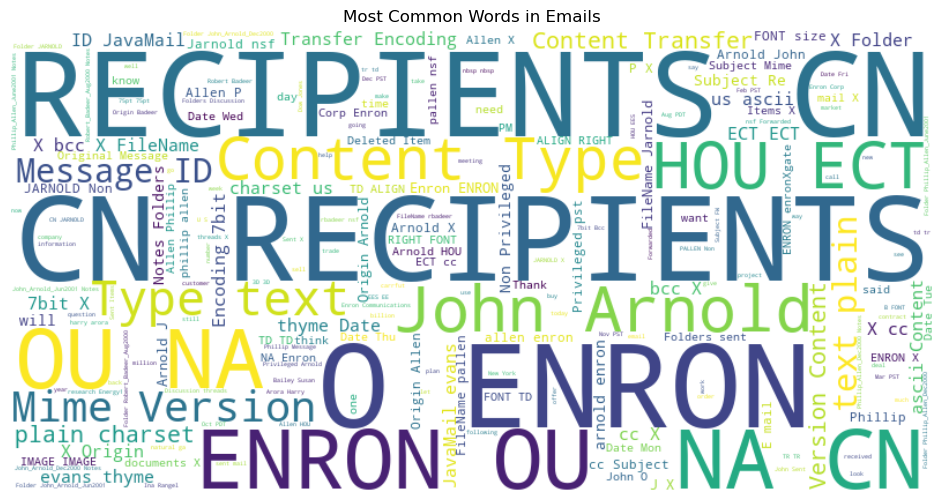

In [26]:
from wordcloud import WordCloud

all_text = " ".join(df["message"].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Emails")
plt.show()


## Step 6: Emails with Highest Lengths
##  Outliers - Top Longest Emails

We display a few examples of unusually long emails which might need investigation.


In [29]:
# Top 5 longest emails
df.sort_values(by="email_length", ascending=False).head(5)[["message", "email_length"]]


,message,email_length
6201,Message-ID: <13395955.1075852729395.JavaMail.e...,126401
5625,Message-ID: <3539387.1075861669799.JavaMail.ev...,104939
6184,Message-ID: <15048276.1075852727859.JavaMail.e...,97367
8060,Message-ID: <10125819.1075861395837.JavaMail.e...,91310
8179,Message-ID: <16098692.1075861391605.JavaMail.e...,91310


## Summary of EDA

- Most emails have moderate lengths with a few long outliers.
- Frequent words include organizational and financial terms.
- These findings will be used to vectorize the text and apply clustering in the next phase.


## Clustering & Fraud Insight

## Step 7: TF-IDF Vectorization
Convert the text emails into numerical features using TF-IDF so clustering can be applied.

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9)

# Transform the email messages
X = vectorizer.fit_transform(df['message'].astype(str))

print("TF-IDF matrix shape:", X.shape)


TF-IDF matrix shape: (10000, 72262)


## Step 8: KMeans Clustering
Group the emails into clusters to detect patterns.

In [37]:
from sklearn.cluster import KMeans

# Define number of clusters
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Preview results
df[['message', 'cluster']].head()


,message,cluster
0,Message-ID: <18782981.1075855378110.JavaMail.e...,2
1,Message-ID: <15464986.1075855378456.JavaMail.e...,2
2,Message-ID: <24216240.1075855687451.JavaMail.e...,2
3,Message-ID: <13505866.1075863688222.JavaMail.e...,2
4,Message-ID: <30922949.1075863688243.JavaMail.e...,2


## Step 9: WordCloud for Each Cluster
Visualize each cluster to understand communication patterns.

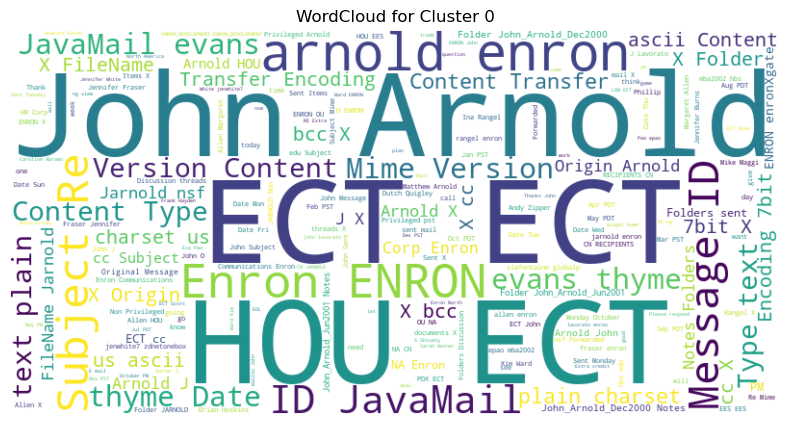

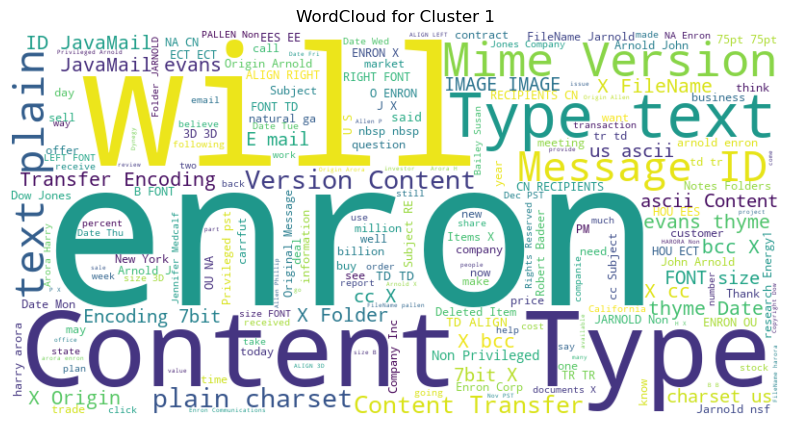

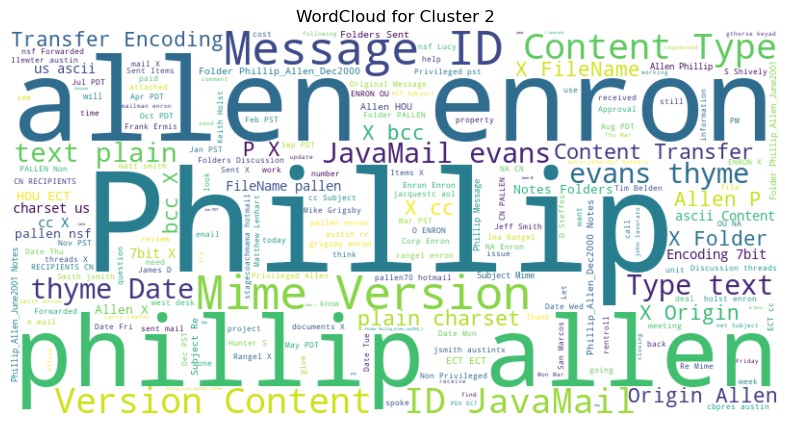

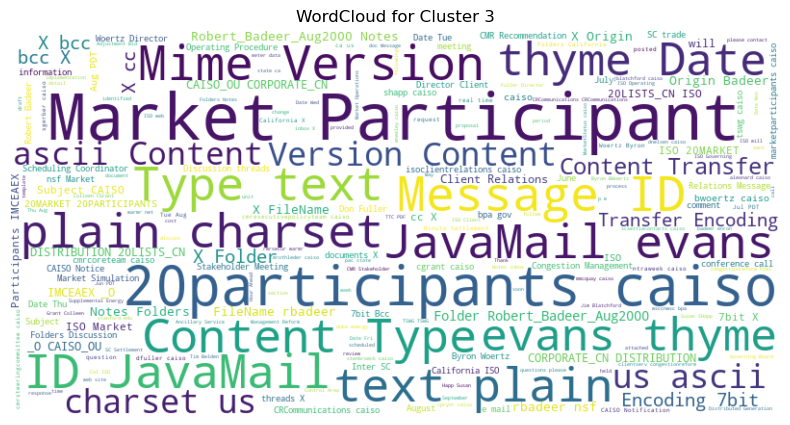

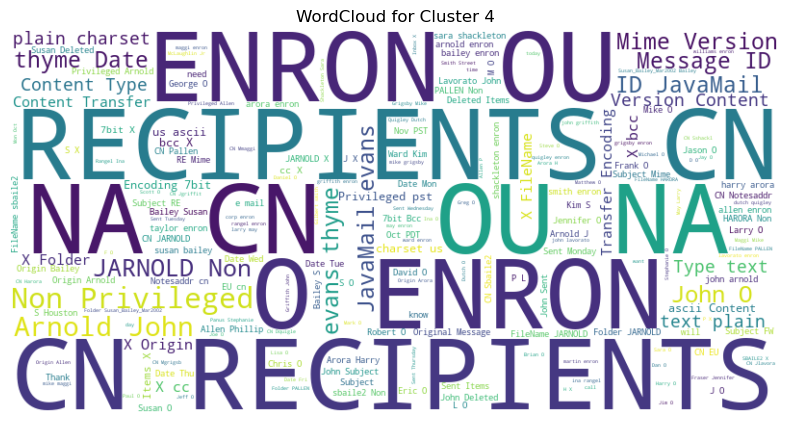

In [41]:
for i in range(k):
    cluster_text = " ".join(df[df['cluster'] == i]['message'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for Cluster {i}')
    plt.show()


# Step 10: Interpretation and Risk Insight

##  Cluster Interpretation

- Each cluster represents a pattern or theme in email communication.
- Clusters with long, emotional, or irregular language can indicate unusual behavior.
- These insights help in identifying suspicious activity or fraud signals.
